<a href="https://colab.research.google.com/github/shah-shivam-410/python-learning-notebooks/blob/main/project/car-price-detection/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries
import tensorflow as tf # models
import pandas as pd # csv reaading
import seaborn as sns # visualization

sns.set_theme(style="darkgrid")

In [ ]:
# Reading sample data
data = pd.read_csv("sample_data/train.csv", delimiter=",")
data.head(n=5)

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [ ]:
data.shape

(1000, 12)

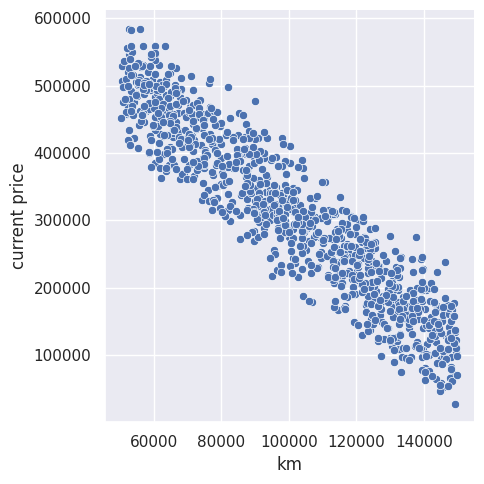

In [ ]:
# sns.pairplot(data[["years", "current price", "km", "hp"]])

sns.relplot(data, x="km", y="current price")
# sns.relplot(data, x="hp", y="current price")

In [ ]:
# Converting to tensor
tensor_data = tf.constant(data)
# print(tensor_data.shape)
# print(tensor_data)
tensor_data[:5, :1] # Simillar to tensor_data[0:5, 0:1] , last index exclusive

<tf.Tensor: shape=(5, 1), dtype=float64, numpy=
array([[1.],
       [2.],
       [3.],
       [4.],
       [5.]])>

In [ ]:
# Shuffling the data
tensor_data_shuffled = tf.random.shuffle(tensor_data)
tensor_data_shuffled[:5, :1]

<tf.Tensor: shape=(5, 1), dtype=float64, numpy=
array([[228.],
       [358.],
       [123.],
       [691.],
       [175.]])>

In [ ]:
x = tensor_data_shuffled[:, 3:-1]
x[:5]
print(x.shape)

TensorShape([1000, 8])

In [ ]:
y = tensor_data_shuffled[:, -1]
y[:5]
print(y.shape)

(1000,)
